<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

Instructions

**Part1: supervised learning**

1) Import you data and perform basic data exploration phase

2) Display general information about the dataset

3) Create a pandas profiling reports to gain insights into the dataset

4) Handle Missing and corrupted values

5) Remove duplicates, if they exist

6) Handle outliers, if they exist

7) Encode categorical features

8) Prepare your dataset for the modelling phase

9) Apply Decision tree, and plot its ROC curve

10) Try to improve your model performance by changing the model hyperparameters

**Part2: unsupervised learning**

1) Drop out the target variable

2) Apply K means clustering and plot the clusters

3) Find the optimal K parameter

4) Interpret the results

# SUPERVISED LEARNING

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load our data
df = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [23]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [24]:
# Profiling report
!pip install ydata-profiling
import ydata_profiling as ydata_profiling

In [25]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="/content/Microsoft_malware_dataset_min.csv")
profile.to_file("/content/Microsoft_malware_dataset_min.csv.html")
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
# Missing values
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [27]:
# Handling missing and corrupted values
import pandas as pd

# Load dataset
df = pd.read_csv("Microsoft_malware_dataset_min.csv")

# Display basic info
print("Initial dataset shape:", df.shape)
print("\nMissing values summary:")
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Percentage', ascending=False)
print(missing_summary)

# Drop columns with more than 50% missing values
threshold = 0.5
cols_to_drop = missing_summary[missing_summary['Percentage'] > threshold * 100].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns (>{threshold*100}% missing): {list(cols_to_drop)}")
print("Dataset shape after column drop:", df.shape)

# Impute numeric columns with median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Optional: Clean common corrupted categorical values
corrections = {
    'ProductName': {
        'winDefend': 'WinDefend',
        'unknown': None
    },
    'SmartScreen': {
        'off': 'Off',
        'OFF': 'Off',
        'requireAdmin': 'RequireAdmin'
    }
}

for col, mapping in corrections.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Final check
print("\nRemaining missing values per column (should be 0):")
print(df.isnull().sum())

# Save cleaned data
df.to_csv("cleaned_microsoft_malware_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_microsoft_malware_dataset.csv'")


Initial dataset shape: (100000, 10)

Missing values summary:
                            Missing Values  Percentage
SMode                                 5932       5.932
Wdft_IsGamer                          3415       3.415
Firewall                              1076       1.076
IsProtected                            391       0.391
Census_IsVirtualDevice                 185       0.185
HasDetections                            0       0.000
Census_HasOpticalDiskDrive               0       0.000
Census_OSEdition                         0       0.000
OsPlatformSubRelease                     0       0.000
CountryIdentifier                        0       0.000

Dropped columns (>50.0% missing): []
Dataset shape after column drop: (100000, 10)

Remaining missing values per column (should be 0):
HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                100000 non-null  float64
 2   Census_IsVirtualDevice      100000 non-null  float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    100000 non-null  float64
 6   SMode                       100000 non-null  float64
 7   IsProtected                 100000 non-null  float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [29]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16114 entries, 0 to 99962
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               16114 non-null  int64  
 1   Wdft_IsGamer                16114 non-null  float64
 2   Census_IsVirtualDevice      16114 non-null  float64
 3   Census_OSEdition            16114 non-null  object 
 4   Census_HasOpticalDiskDrive  16114 non-null  int64  
 5   Firewall                    16114 non-null  float64
 6   SMode                       16114 non-null  float64
 7   IsProtected                 16114 non-null  float64
 8   OsPlatformSubRelease        16114 non-null  object 
 9   CountryIdentifier           16114 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.4+ MB


<Axes: >

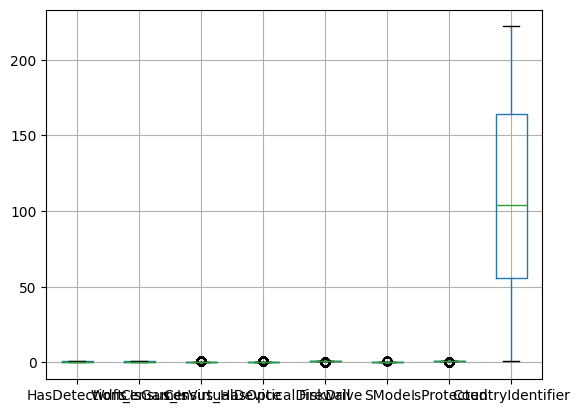

In [31]:
# Plot outliers
df.boxplot()

In [32]:
# Encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("cleaned_microsoft_malware_dataset.csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except Exception as e:
        print(f"Could not encode column {col}: {e}")

# Check results
print("\nEncoded dataset sample:")
print(df.head())

# Save the encoded dataset
df.to_csv("encoded_microsoft_malware_dataset.csv", index=False)
print("\nLabel-encoded dataset saved as 'encoded_microsoft_malware_dataset.csv'")



Encoded dataset sample:
   HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  Census_OSEdition  \
0              0           0.0                     0.0                11   
1              0           0.0                     0.0                11   
2              0           0.0                     0.0                 1   
3              1           0.0                     0.0                11   
4              1           0.0                     0.0                 1   

   Census_HasOpticalDiskDrive  Firewall  SMode  IsProtected  \
0                           0       1.0    0.0          1.0   
1                           0       1.0    0.0          1.0   
2                           0       1.0    0.0          1.0   
3                           0       1.0    0.0          1.0   
4                           0       1.0    0.0          1.0   

   OsPlatformSubRelease  CountryIdentifier  
0                     4                 29  
1                     4                 93  
2   

In [33]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.0,0.0,1,0,1.0,0.0,1.0,4,18


In [34]:
# Preparing dataset for modelling
if 'HasDetections' not in df.columns:
    raise ValueError("Target column 'HasDetections' not found in the dataset.")
df = df.dropna(subset=['HasDetections'])

X = df.drop(columns=['HasDetections'])
y = df['HasDetections']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Train Decision Tree and compute ROC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc_base = auc(fpr, tpr)


In [36]:
# Improving model performance by changing the model hyperparameters
# Train tuned Decision Tree
clf_tuned = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf_tuned.fit(X_train, y_train)
y_probs_tuned = clf_tuned.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_probs_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)


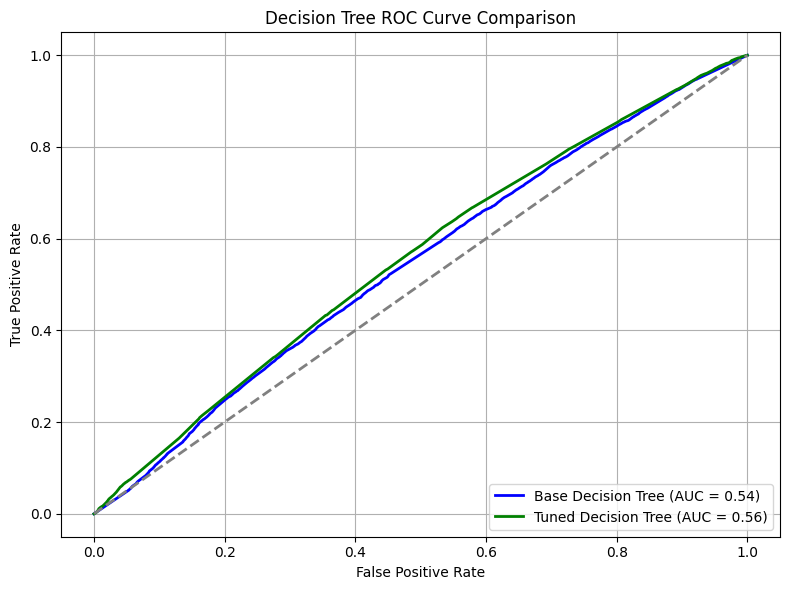

(np.float64(0.5447090940820437), np.float64(0.5570486374743233))

In [37]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Base Decision Tree (AUC = {roc_auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Decision Tree (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

roc_auc_base, roc_auc_tuned

# UNSUPERVISED LEARNING

In [39]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
# Applying K means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
kmeans_silhouette_score = silhouette_score(df, kmeans_labels)
print('K_means Silhouette: ', kmeans_silhouette_score)

K_means Silhouette:  0.5621067456431071


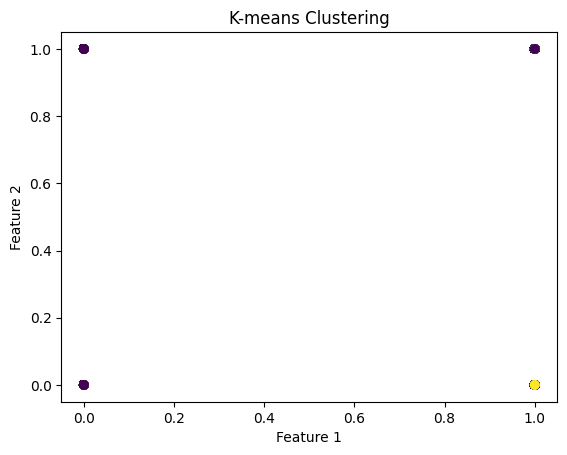

In [41]:
# Plotting the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

Text(0, 0.5, 'Inertia')

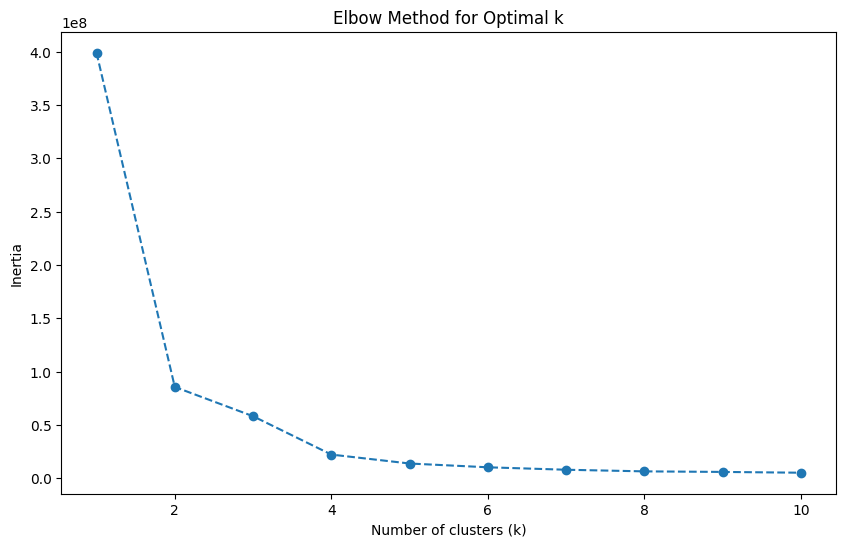

In [43]:
# Finding the optimal k parameter
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")


# Interpreting the results

Since this is unsupervised, we can’t directly tie clusters to malware presence (HasDetections), but:

You can compare the original target labels across clusters to infer relationships.

You might run df['Cluster'] = clusters and inspect cluster-wise summaries of original features or detection rates.